In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> # What is Machine Learning?

There are many definitions, all of which describe a core aspect of ML.

1. Machine learning is to be able to write programs with data without explicitly writing them.

2. Machine learning is the process to automatically extract knowledge from data, usually with the goal of making predictions on new, unseen data. 

3. Machine Learning is about coding programs that automatically adjust (or *tune*) their performance from exposure to information (*learning*) encoded in data. 
    - This learning is achieved via **tunable parameters** that are automatically adjusted according to performance criteria.

Machine Learning can be considered a subfield of Artificial Intelligence (AI).

---
> ### Further Reading

- More definitions on [Quora](https://www.quora.com/What-is-machine-learning-4)
- A Visual Introduction to Machine Learning by [R2D3](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)

---
> ## Motivating Example

#### Problem Statement
You are given a task: build an Human Resources classifier; we want to be able to classify company news into human resources or not.
    
#### What do you do? 

- Let's look at the job titles in the news. It may not say if it is human resources event, but the news that has job titles in the news is more probable to be human resources news.
- If there are company names, that is also a good signal. 
- We could look at the verbs and other noun forms(hiring, resignation, letting go, laying off) to say that is actually an HR article.
- We combine all these rules.
- Then, we use some heuristics to determine a threshold to "classify" the news article whether it is an HR or not.

#### Disadvantages
- Rule and heuristic based. If we want to _improve_ the classifier, we introduce more rules.
- The rules are highly dependent on the developer. Biases and prejudices on the articles that you read will be the main driver.
- For a more complicated classification problem, you may not cover all of the rules.
- For a domain that you do not know much about, you need to first learn the domain, the article structure and what you need to use to build the rules.(this is true for machine learning but a lesser extent).


#### *Method 1 - Handcrafted Business Rules*

In [2]:
company_names = ['Google', 'Microsoft', 'Apple']
job_titles = ['CFO', 'CEO', 'CTO']

In [43]:
def hr_or_not(text):
    SOME_THRESHOLD = 20
    confidence = 0
    
    ### HR article keywords
    if 'hire' in text or 'hiring' in text or 'join' in text or 'joining' in text or 'laying off' in text or 'resign' in text:   
        confidence += 10

    # Job titles are definitely good again, HR articles generally say the position of the new hire
    for job_title in job_titles:
        if job_title in text:
            confidence += 10

    # If we have company name, that is a good sign as article could be in business domain
    for company_name in company_names:
        if company_name in text:
            confidence += 10

    label = 0
    
    if confidence >= SOME_THRESHOLD:
        label = 1 # It is an hr article
        
    if (label == 1):
        print('-- {} -- is an HR article'.format(text)) 
    else: 
        print('-- {} -- is not an HR article'.format(text))    
                
    return None

In [44]:
text = 'Microsoft recently hired Satya Nadella AS CEO'
hr_or_not(text)

-- Microsoft recently hired Satya Nadella AS CEO -- is an HR article


In [45]:
hr_or_not("Virat Kohli to captain India's test side")

-- Virat Kohli to captain India's test side -- is not an HR article


In [46]:
hr_or_not('Bomb set off in a remote mountain location')

-- Bomb set off in a remote mountain location -- is not an HR article


In [47]:
hr_or_not('Google renames itself as Alphabet, hires new CEO')

-- Google renames itself as Alphabet, hires new CEO -- is an HR article


In [48]:
hr_or_not('Apple sees massive laying off')

-- Apple sees massive laying off -- is an HR article


#### *Method 2 - With Data*

# ALL MODELS ARE WRONG

# SOME MODELS ARE USEFUL

---
## Fundamental ML Concepts

---
#### 1. AUTOMATED PARAMETER LEARNING

- Central to machine learning is the concept of **making decision automatically** from data, **without the user specifying explicit rules** how this decision should be made.  

---
#### 2. GENERALIZATION

- The second central concept is **generalization**. The goal of a machine learning algorithm is to predict on new, previously unseen data. We need to learn small amount of data and induce from it; generalize over much larger datasets by using that knowledge. 
- Typically, we need to make a trade-off between the flexibility and accuracy of the model (_the bias-variance tradeoff_).


#### Advantages of Generalization  

- No rules, no heuristic.
- Provides an evaluation mechanism and based on the classifier, probability of the classifier for a given class. You could have confidence levels based on probability of classifier.(if you still need it).
- As long as you have a representative training data, you would have a much more comprehensive classifier.
- In order to improve the classifier, you need more data. This scales very well. 
- If you want to still incorporate heuristics and rules, you could still have the option. Actually, if you want to improve on precision or recall, some heuristics may come handy in order to prevent false positives and/or false negatives.

---
### The Three major classes of ML:

**Supervised learning**
: Algorithms which learn from a training set of *labeled* examples (exemplars) to generalize to the set of all possible inputs. Examples of supervised learning include regression and classification

**Unsupervised learning**
: Algorithms which learn from a training set of *unlableled* examples, using the features of the inputs to categorize inputs together according to some statistical criteria. Examples of unsupervised learning include k-means clustering and kernel density estimation.

**Reinforcement learning**
: Algorithms that learn via reinforcement from a *critic* that provides information on the quality of a solution, but not on how to improve it. Improved solutions are achieved by iteratively exploring the solution space. 
- We will not cover RL in this course.


---
## Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both input features and a desired output. The task is to construct a model (or program) which is able to predict the desired output of an unseen object given the set of features. 

Supervised learning is further broken down into two categories, **classification** and **regression**. 

- In _classification_, the label is **discrete**
- In _regression_, the label is **continuous**

Though, from one point of view, the fact that continuous labels can be binned into categorical variables, one might argue that these tasks are interchangable.
And they are.

Another important thing to remember is that in supervised learning, there is always a distinction between 

- a **training set** for which the desired outcome is given, and 
- a **test set** for which the desired outcome needs to be inferred.

#### Examples/Applications of Supervised Learning

- given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy. (classification)
- given a photograph of a person, identify the person in the photo. (classification)
- given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like. (recommendation)
- given a persons age, education and position, infer their salary (regression)

---

## Unsupervised Learning: Clustering and friends

In **Unsupervised Learning** there is no desired output associated with the data. Instead, we are interested in extracting some form of knowledge or discover some sort of structure in the data.

> In a sense, you can think of unsupervised learning as a means of _discovering labels from the data_ itself. 

Unsupervised learning comprises tasks such as 
- *dimensionality reduction*, 
- *clustering*, and
- *density estimation*.

####  Examples/Applications of Unsupervised Learning

- given detailed observations of distant galaxies, determine which features or combinations of features summarize best the information.
- given a mixture of two sound sources (for example, a person talking over some music), separate the two
- given a large collection of news articles, find recurring topics inside these articles.
- given a collection of images, cluster similar images together (for example to group them when visualizing a collection)



---
## Training and Test Data

Real world systems learn from the data they have (historical), and as other data comes in (from customers, sensors, or other sources) the classifier that was trained must predict on fundamentally **new** data. 

We can **simulate** this phenomenon during training using a train/test split.

> The test data is a simulation of "future data" which will come into the system during production.

Data might sometimes be sorted, so simple splitting would lead us to has misrepresented proportions of classes in our splits. To get an accurate simulation of the real world, we shuffle our data then split it.

scikit-learn has a prebuilt function, `train_test_split()` to split data into training and testing for you. It works on the following syntax:
    
    from sklearn.cross_validation import train_test_split
    train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7)
    
By evaluating our model's performance on data that has been seen during training, we could get *false confidence* in the power of our system. This might lead to putting a system into production which fails at predicting new data!

> As a rule of thumb, always evalute/report model performance on out-of-sample data.

Read: [Overfitting](http://www.wikiwand.com/en/Overfitting)

---
### The Student-Professor Analogy

As an interesting analogy, consider the simple case of students appearing for an exam. You, the professor, have taught them their curriculum well and helped them solve many exercises in-class. Now, you hope that these students will be able to take that knowledge and apply it to problems they've never seen before. 

If you quiz them on the same questions they've solved before, their performance will be very good. But only when they solve unseen problems accurately, can you safely conclude that they've learned their subject well. For this reason, you need to train them on a set of problems separate and distinct from the ones you will test them on.

---

## CRISP - DM

[Wikipedia](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining)



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/800px-CRISP-DM_Process_Diagram.png" height=500px width=500px>

---

## Machine Learning in Python with `scikit-learn`

ML is about building models with **tunable parameters** that are adjusted automatically so as to improve their behavior by **adapting to training data.**

### `scikit-learn` basics

* Most machine learning algorithms implemented in scikit-learn expect data to be stored in a **two-dimensional array or matrix**. 

* Scikit-learn strives to have a **uniform interface** across all methods  

* The size of the array is expected to be `[n_samples, n_features]`
    - **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
    - **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases



** NOTE **:

> There are some problems with very high dimensionality (hundreds of features) with most of them being zeros (**sparse matrix**). This is a case where `scipy.sparse` matrices can be useful as much more memory-efficient than numpy arrays.



---
# `scikit-learn` interface

All objects within scikit-learn share a uniform common basic API consisting of three complementary interfaces:
- **estimator** interface for building and ﬁtting models, is at the core of the library. It,
    - deﬁnes instantiation mechanisms of objects and exposes a **.fit()** method for learning a model from training data. 
    - All supervised and unsupervised **learning algorithms** (e.g., for classiﬁcation, regression or clustering) are oﬀered as objects implementing this interface. 
    - Machine learning tasks like **feature extraction, feature selection or dimensionality reduction** are also provided as estimators.
- **predictor** interface for making predictions
- **transformer** interface for converting data.





---
## Classes and Functions within `scikit-learn`

- Datasets for prototyping or learning
    - **`sklearn.datasets`**: Datasets


- Tools for structuring/streamlining your analysis
    - **`sklearn.pipeline`**: Pipeline


- Data Preparation for Machine Learning
    - **`sklearn.preprocessing`**: Preprocessing and Normalization
    - **`sklearn.feature_selection`**: Feature Selection
    - **`sklearn.feature_extraction`**: Feature Extraction


- ML Algorithms (selected list)
    - **`sklearn.cluster`**: Clustering
    - **`sklearn.linear_model`**: Generalized Linear Models
    - **`sklearn.multiclass`**: Multiclass classification
    - **`sklearn.svm`**: Support Vector Machines
    - **`sklearn.tree`**: Decision Trees
    - **`sklearn.naive_bayes`**: Naive Bayes
    - **`sklearn.neighbors`**: Nearest Neighbors
    - **`sklearn.neural_network`**: Neural network models


- Model Ensembling 
    - **`sklearn.ensemble`**: Ensemble Methods


- Performance Evaluation
    - **`sklearn.cross_validation`**: Cross Validation
    - **`sklearn.metrics`**: Metrics

----
## Datasets availabe with `scikit-learn`

* **Available Data**: small datasets for quick prototyping, stored within sklearn (no need to download)
    * `sklearn.datasets.load_*`  
    

* **Downloadable Data:** larger datasets available for download, `scikit-learn` includes tools which streamline this process.
    * ``sklearn.datasets.fetch_*``
    
    
* **Generated Data:** there are several datasets which are generated from models based on a random seed.  These are available in 
    * ``sklearn.datasets.make_*``

## Example: Linear Regression

In [9]:
from sklearn.datasets import load_diabetes, make_classification, load_iris

In [104]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [106]:
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
from sklearn.model_selection import train_test_split

In [148]:
X = pd.DataFrame(data=load_diabetes()['data'], columns=load_diabetes()['feature_names'])
y = pd.Series(load_diabetes()['target'], name='disease_progression')

In [150]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [151]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: disease_progression, dtype: float64

In [152]:
df = pd.concat([X, y], axis=1)

In [153]:
df.sample(10).round(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
305,-0.009,0.051,-0.040,-0.040,-0.008,0.016,-0.065,0.071,0.018,-0.067,124.0
425,-0.078,-0.045,-0.041,-0.081,-0.101,-0.113,0.023,-0.076,-0.020,-0.051,152.0
136,-0.093,-0.045,-0.082,-0.057,-0.061,-0.068,0.049,-0.076,-0.066,-0.022,85.0
201,-0.035,0.051,-0.056,-0.016,-0.010,-0.008,0.038,-0.039,-0.053,0.028,39.0
13,0.005,0.051,-0.002,0.008,-0.004,-0.016,-0.003,-0.003,0.038,-0.014,185.0
126,-0.089,-0.045,-0.061,-0.026,-0.055,-0.055,0.041,-0.076,-0.094,-0.055,99.0
68,0.038,0.051,-0.030,-0.040,-0.033,-0.024,-0.010,-0.003,-0.013,0.003,160.0
424,0.002,0.051,0.011,-0.019,-0.017,-0.004,-0.047,0.034,0.024,0.024,111.0
299,0.038,0.051,-0.014,-0.016,-0.036,-0.022,-0.014,-0.003,-0.026,-0.001,83.0
229,-0.027,0.051,-0.016,-0.030,0.004,-0.001,0.041,-0.039,-0.024,0.011,53.0


In [155]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

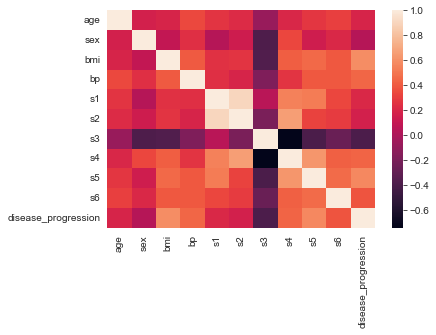

In [157]:
sns.heatmap(df.corr().round(2))

In [161]:
# Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [107]:
from sklearn.linear_model import LinearRegression

In [192]:
# Define the model object
lm_1 = LinearRegression()

In [193]:
# Train the model
lm_1.fit(X_train, y_train)

LinearRegression()

In [194]:
# Check the coefficients
lm_1.coef_

array([  -6.18504945, -225.23239417,  505.20147591,  295.61096358,
       -826.05108427,  466.91042831,  130.74554142,  252.95462152,
        691.08257004,  111.20752686])

In [195]:
# Check the intercept
lm_1.intercept_

152.0483522597592

In [196]:
pd.Series(data=lm_1.coef_, index=X.columns).round(2)

age     -6.19
sex   -225.23
bmi    505.20
bp     295.61
s1    -826.05
s2     466.91
s3     130.75
s4     252.95
s5     691.08
s6     111.21
dtype: float64

In [197]:
# Test the model
y_pred = lm_1.predict(X_test)

In [198]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

2724.2580795987546

In [199]:
explained_variance_score(y_test, y_pred)

0.5676179450476894

<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

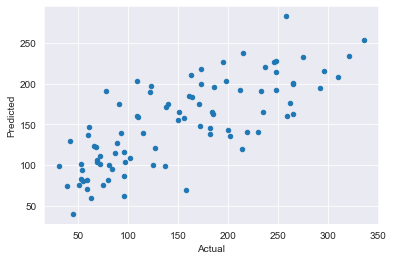

In [179]:
pd.DataFrame({'Actual': y_test, 
           'Predicted': y_pred}).plot.scatter(x='Actual', y='Predicted')

In [134]:
errors = y_pred - y_test

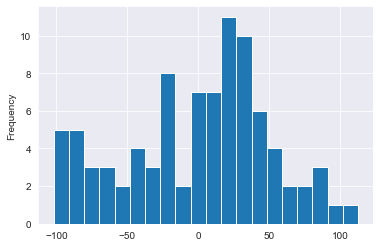

In [180]:
errors.plot.hist(bins=20);

In [139]:
errors.describe()

count     89.000000
mean      -0.422790
std       52.488425
min     -101.993239
25%      -36.617056
50%        6.436929
75%       34.795263
max      112.602223
Name: disease_progression, dtype: float64

In [181]:
from sklearn.tree import DecisionTreeRegressor

In [182]:
tree_1 = DecisionTreeRegressor()

In [183]:
tree_1.fit(X_train, y_train)

DecisionTreeRegressor()

In [184]:
y_pred = tree_1.predict(X_test)

In [185]:
error_tree = y_test - y_pred

<AxesSubplot:ylabel='Frequency'>

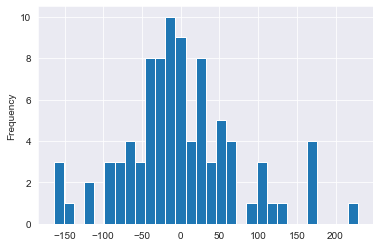

In [188]:
error_tree.plot.hist(bins=30)

In [189]:
mean_squared_error(y_test, y_pred)

5454.494382022472

In [190]:
from sklearn.metrics import explained_variance_score

In [191]:
explained_variance_score(y_test, y_pred)

0.13442269706012966

---
* **Packaged Data:** small datasets packaged with `scikit-learn`, can be downloaded using 
    * ``sklearn.datasets.load_*``

## Example: `iris` data

In [203]:
from sklearn.datasets import load_iris
iris = load_iris()

In [204]:
iris.data.shape

(150, 4)

In [205]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [206]:
df_iris = pd.concat([DataFrame(iris.data, columns=iris.feature_names), 
                     DataFrame(iris.target, columns=['Target'])], axis=1)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


---
# Exercise 1

Load the Boston Data.
Check out the data types, shape, summary

Create a dataframe with the boston data.

In [201]:
# %load exercise1_load_boston.py

----

## The `scikit-learn` Estimator API

All models in scikit-learn have a very consistent interface.  We create an estimator object, defining required parameters, and then work with its methods.

### The `estimator` object 

- Every algorithm is exposed in scikit-learn via an `estimator` object. It is **instantiated** with the following syntax:

---
        from sklearn.<est_family> import <estimator>
        est_obj = <estimator>(<parameters>)
        
---

- All the **parameters** of an estimator **are set** when it is instantiated. (suitable defaults are set already.)

        print(est_obj)

- When the estimator is fit to the data, **parameters are estimated** from the data at hand. 
 
        est_obj.fit(training data, training labels, parameters)


- All the estimated parameters are attributes of the estimator object. An underscore at the end indicates a fit parameter

        print(est_obj.coef_)
        print(est_obj.intercept_)

### `estimator` object _methods_

- Available in **all Estimators**
    - **`model.fit()`** : fit training data. 
        - For **supervised** learning applications, this accepts **two arguments**: the data `X` and the labels `y` 
            - e.g. `model.fit(X_train, y_train)`
        - For **unsupervised** learning applications, this accepts only a **single argument**,
    the data `X` 
            - e.g. `model.fit(X_train)`


- Available in **supervised estimators**
  + **`model.predict()`** : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_test)`),
    and returns the learned label for each object in the array.
  + **`model.predict_proba()`** : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + **`model.score()`** : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.


- Available in **unsupervised estimators**
  + **`model.predict()`** : predict labels in clustering algorithms.
  + **`model.transform()`** : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + **`model.fit_transform()`** : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.



---
## Regressions

- `Linear` - simple
- `Logistic` - transformation of the linear model for non linear data
- `Ridge + Lasso` - special cases of linear for addressing overfitting
- `ElasticNet` - a combination of Ridge and Lasso

In [9]:
# Simple Models
from sklearn.linear_model import LinearRegression, LogisticRegression

# Regularized Models
from sklearn.linear_model import Lasso, Ridge,  ElasticNet

In [ ]:
Lasso?

In [ ]:
# Using all defaults
lasso_0 = Lasso()

In [ ]:
# Not using defaults. Manually specify parameter values.
lasso_1 = Lasso(alpha = 0.9, tol = 0.001)

---

## Exploring Models

In [315]:
from sklearn.tree import DecisionTreeClassifier 
# import model class

In [319]:
# define model object with hyperparamenteres

tree_1 = DecisionTreeClassifier(max_depth=3, min_samples_split=50, class_weight='balanced')

tree_1.fit(X_train, y_train)

y_predict = tree_1.predict(X_test)

accuracy_score(y_test, y_pred)

In [ ]:
# An Unsupervised Estimator
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=5)

In [ ]:
pca_1?

In [ ]:
# A transformer
from sklearn.preprocessing import RobustScaler
robust_1 = RobustScaler()

In [ ]:
robust_1?

---
# Machine Learning Cheat Sheet

<br>

![](https://user-images.githubusercontent.com/71872551/146676581-38d6d9a9-bc67-4257-9639-c4406d5c280a.png)

---
# Classification Algorithms

<br>

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

---
# Clustering Algorithms

<br>

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

----

# Classification Models

## 1. k Nearest Neighbors

In [324]:
from sklearn.datasets import load_iris
iris = load_iris()

In [325]:
df_iris = (pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
           .join(pd.Series(iris['target'], name='type_iris').map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})))

In [326]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_iris
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


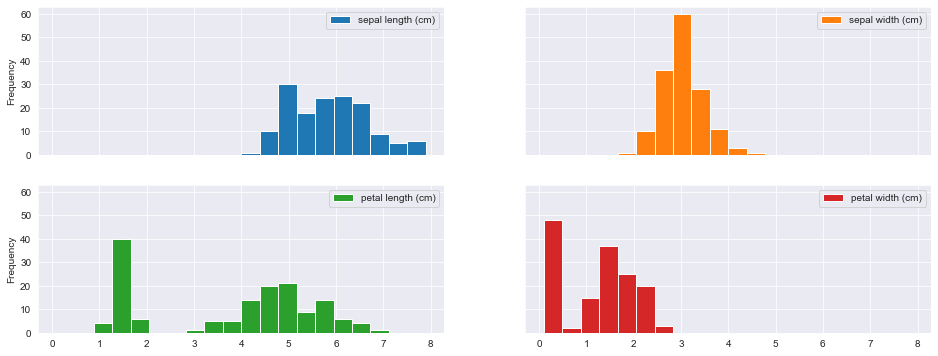

In [329]:
import seaborn as sns
sns.set_style('darkgrid')

df_iris.drop(columns='type_iris').plot.hist(subplots=True, layout=(2,2), figsize=(16, 6), bins=20, sharex=True, sharey=True);

In [328]:
df_iris.groupby('type_iris').mean().round(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
type_iris,,,,
setosa,5.0,3.4,1.5,0.2
versicolor,5.9,2.8,4.3,1.3
virginica,6.6,3.0,5.6,2.0


<AxesSubplot:ylabel='type_iris'>

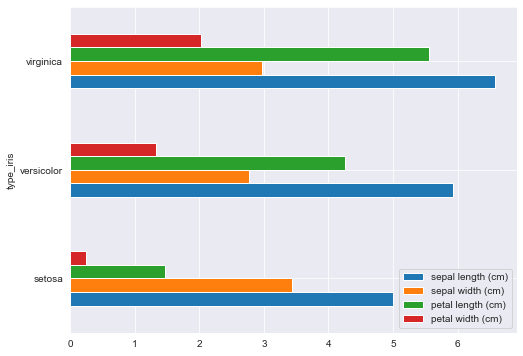

In [42]:
df_iris.groupby('type_iris').mean().plot.barh(figsize=(8, 6))

In [68]:
df_iris.groupby('type_iris').agg(('min', 'mean', 'max')).round(1).T

type_iris               setosa  versicolor  virginica
sepal length (cm) min      4.3         4.9        4.9
                  mean     5.0         5.9        6.6
                  max      5.8         7.0        7.9
sepal width (cm)  min      2.3         2.0        2.2
                  mean     3.4         2.8        3.0
                  max      4.4         3.4        3.8
petal length (cm) min      1.0         3.0        4.5
                  mean     1.5         4.3        5.6
                  max      1.9         5.1        6.9
petal width (cm)  min      0.1         1.0        1.4
                  mean     0.2         1.3        2.0
                  max      0.6         1.8        2.5

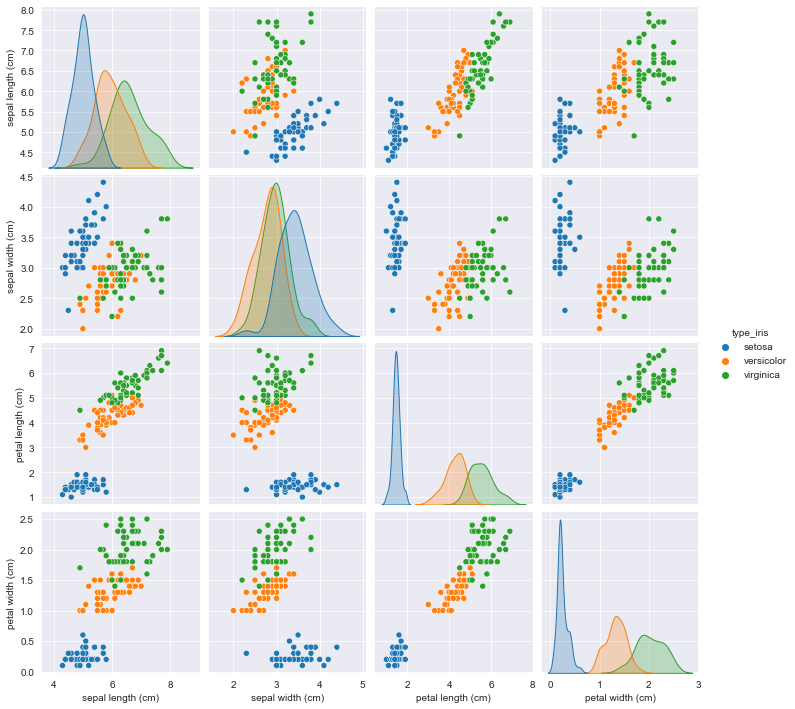

In [64]:
sns.pairplot(data=df_iris, hue='type_iris');

---
# 2. Dimensionality Reduction using PCA

PCA is a technique to reduce the number of features in our data by finding new _components_ to represent the data. These components are typically 

- a **linear** combination of the old data; and 
- designed to _iteratively_ capture the majority of the total variance explained by the full dataset.
- each successive PC should be perpendicular (uncorrelated) with the ones before

> PCA is a very handy technique for visualizing higher-dimensional data in 2- or 3-dimensions, which are intuitively interpretable.

Here's an **example**:

We know that the `iris` dataset has four dimensions. To visualize this data, we can bring it down to two dimensions that capture most of the variance - 

In [47]:
from sklearn.decomposition import PCA

print(X.shape)

(150, 4)


In [ ]:
# pca.fit(X)
# X_pca = pca.transform(X)

In [330]:
X, y = iris['data'], iris['target']

In [331]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(X_pca.shape)

(150, 2)


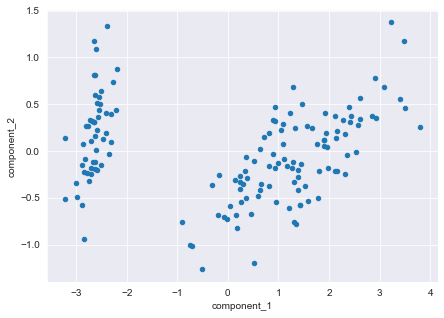

In [332]:
pd.DataFrame(X_pca, 
             columns=['component_1', 'component_2']).plot.scatter(x='component_1', y='component_2', figsize=(7, 5));

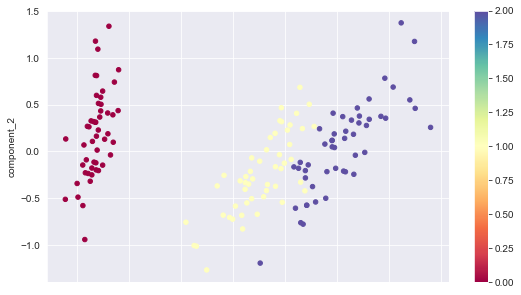

In [333]:
pd.DataFrame(X_pca, 
             columns=['component_1', 'component_2']).plot.scatter(x='component_1', y='component_2', c=y, cmap='Spectral', figsize=(9, 5));

In [334]:
# Factor Loadings - 

pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=iris.feature_names).round(2)

,PC1,PC2
sepal length (cm),0.36,0.66
sepal width (cm),-0.08,0.73
petal length (cm),0.86,-0.17
petal width (cm),0.36,-0.08


In [335]:
# Create the model object, set the parameters to be evaluated

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [339]:
# Use the estimator's fit() method to estimate parameters (learn the model)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [341]:
def predict_iris_type(arr):
    return (knn.predict(np.array(arr).reshape(1, -1)), 
            iris['target_names'][knn.predict(np.array(arr).reshape(1, -1))])[1][0]

In [342]:
predict_iris_type([5.0, 2.4, 4.4, 2.2])

'virginica'

In [343]:
predict_iris_type([5.1,  3.5,  1.4,  0.2])

'setosa'

In [344]:
predict_iris_type([5.1,  2.5,  4.4,  1.2])

'versicolor'

In [345]:
predict_iris_type([4.1,  1.5,  3.4,  2.2])

'versicolor'

---
# Build the full model

In [346]:
from sklearn.model_selection import train_test_split

In [347]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [348]:
X_tr, X_te, y_tr, y_te = train_test_split(df_iris.drop(columns='type_iris'), df_iris['type_iris'], train_size=0.7)

In [349]:
knn = KNeighborsClassifier(n_neighbors=2)

In [350]:
knn.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=2)

In [351]:
y_pred = knn.predict(X_te)

In [190]:
y_prob = knn.predict_proba(X_te)

In [354]:
df_pred = \
(pd.concat([
    pd.Series(y_pred, index=y_te.index, name='predicted'),
    y_te.rename('actual')
], axis=1)
 .assign(match=lambda fr: (fr['actual']==fr['predicted']))
 .assign(match_int=lambda fr: (fr['actual']==fr['predicted']).astype(int))
)

In [355]:
df_pred

,predicted,actual,match,match_int
117,virginica,virginica,True,1
85,versicolor,versicolor,True,1
84,versicolor,versicolor,True,1
134,virginica,virginica,True,1
50,versicolor,versicolor,True,1
38,setosa,setosa,True,1
43,setosa,setosa,True,1
68,versicolor,versicolor,True,1
1,setosa,setosa,True,1
83,virginica,versicolor,False,0


In [356]:
df_pred.groupby('match').head()

,predicted,actual,match,match_int
117,virginica,virginica,True,1
85,versicolor,versicolor,True,1
84,versicolor,versicolor,True,1
134,virginica,virginica,True,1
50,versicolor,versicolor,True,1
83,virginica,versicolor,False,0
119,versicolor,virginica,False,0


In [357]:
print(f"Accuracy of the model: {df_pred.match_int.mean():.3%}")

Accuracy of the model: 95.556%


In [358]:
accuracy_score(y_te, y_pred)

0.9555555555555556

In [359]:
pd.DataFrame(data=confusion_matrix(y_te, y_pred), index=iris['target_names'], columns=iris['target_names'])

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,14,1
virginica,0,1,16


In [214]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# run the same code again, what happens?

In [194]:
# now let's change the value of n and see what happens

In [ ]:
# use random_state 

In [362]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

----
## Example 2: `SVM`

- Support Vector Machines
- Using the rbf kernel

In [217]:
from sklearn.svm import SVC 
# Support Vector Classfiers

#SVC?

In [218]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_tr, y_tr)

SVC()

In [222]:
y_pred = model_rbf.predict(X_te)

# Confusion Matrix obtained by taking crosstab of actual dv vs. predicted dv.
pd.DataFrame(data=confusion_matrix(y_te, y_pred), index=iris['target_names'], columns=iris['target_names'])

,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,17,1
virginica,0,0,12


In [223]:
accuracy_score(y_te, y_pred)

0.9777777777777777

In [226]:
print(classification_report(y_te, model_rbf.predict(X_te)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

---
## Using the `linear` kernel

In [235]:
svc_lin = SVC(kernel='linear').fit(X_tr, y_tr)

In [236]:
accuracy_score(y_te, svc_lin.predict(X_te))

0.9777777777777777

---
# Feature Selection

- when we have a high number of features, we want to select the ones that have high correlation/impact on the target
- this reduces the complexity of the model and the hardware requirements

In [366]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

In [367]:
f_regression(iris['data'], iris['target'])

(array([ 233.8389959 ,   32.93720748, 1341.93578461, 1592.82421036]),
 array([2.89047835e-32, 5.20156326e-08, 4.20187315e-76, 4.15531102e-81]))

In [368]:
pd.DataFrame(data=f_regression(iris['data'], iris['target']), 
             index=['FScores', 'Pvalues'], 
             columns=iris['feature_names']).T

,FScores,Pvalues
sepal length (cm),233.838996,2.890478e-32
sepal width (cm),32.937207,5.201563e-08
petal length (cm),1341.935785,4.201873e-76
petal width (cm),1592.824210,4.155311e-81


In [369]:
skb = SelectKBest(k=2, score_func=f_regression)
skb.fit(iris['data'], iris['target'])

SelectKBest(k=2, score_func=<function f_regression at 0x17e8eea70>)

In [370]:
# which features were selected

selected_features = np.array(iris['feature_names'])[skb.get_support()]
selected_features.tolist()

['petal length (cm)', 'petal width (cm)']

----
# `Preprocessing and Dimensionality Reduction`

Preprocessing data, Dimensionality reduction, Manifold Learning and Feature Extraction are tools for finding a new representation of the input data without any additional input and while retaining most of the information contained in the original input dataset.

### 1. Preprocessing

Many ML models require the input data to have zero mean and unit variance in order to avoid biasing the estimated parameters towards features with different units. Applying this step in `scikit-learn` has a very similar interface to other supervised learning algorithms. 

Steps involved in this process:

- Import and instantiate the `StandardScaler()` function to create a preprocessing object
- Apply it to the input data using `.fit()` to learn the required parameters for each feature
- Rescale your data by applying the `.transform()` (*not* predict) method

Here's an example:

In [371]:
# Import scaler and instantiate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [372]:
X_tr.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
78,6.0,2.9,4.5,1.5
138,6.0,3.0,4.8,1.8
87,6.3,2.3,4.4,1.3
21,5.1,3.7,1.5,0.4
120,6.9,3.2,5.7,2.3


In [373]:
# Learn the parameters for rescaling
scaler.fit(X_tr)

StandardScaler()

In [374]:
scaler.mean_, scaler.scale_

(array([5.81142857, 3.0552381 , 3.68666667, 1.16190476]),
 array([0.84721553, 0.42961355, 1.76462955, 0.76137482]))

In [375]:
# Apply it to the data
X_scaled = scaler.transform(X_tr)

df_X_scaled = pd.DataFrame(data=X_scaled, index=X_tr.index, columns=X_tr.columns)

In [377]:
df_X_scaled.mean().round(2)

sepal length (cm)   -0.0
sepal width (cm)     0.0
petal length (cm)   -0.0
petal width (cm)     0.0
dtype: float64

In [378]:
df_X_scaled.std().round(2)

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64

## Standardizing variables doesn't affect correlations

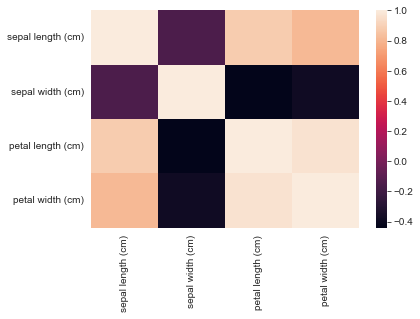

In [379]:
sns.heatmap(X_tr.corr());

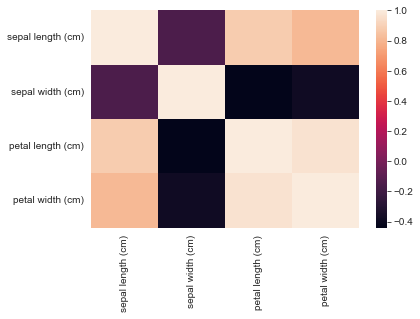

In [380]:
sns.heatmap(df_X_scaled.corr());

---
# Parameter Selection and Performance Metrics

---

### The Bias-Variance Tradeoff


---
In statistics and machine learning, the bias–variance tradeoff (or dilemma) is the problem of simultaneously minimizing two **sources of error** that prevent supervised learning algorithms from generalizing beyond their training set (or, that lead to _overfitting_ or _underfitting_):

* The **bias** is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (**underfitting**). The model performs poorly on training data. This usually happens when **your model doesn't have enough complexity** to capture the variance in the data. <br><br>

* The **variance** is error from sensitivity to small fluctuations in the training set. High variance can cause **overfitting**: modeling the random noise in the training data, rather than the intended outputs. This is expected to happen if your model is **too complex**

The bias–variance decomposition is a way of analyzing a learning algorithm's expected **generalization error** with respect to a particular problem as a sum of three terms, the bias, variance, and a quantity called the **irreducible error**, resulting from noise in the problem itself.

This tradeoff applies to all forms of supervised learning: classification, regression.

---

- http://scott.fortmann-roe.com/docs/BiasVariance.html
- https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff


Most models have parameters that influence the **complexity** of the model. 

> There is always a trade-off that the modeler must make between model **flexibility** and **interpretability**.

A highly complex model may fit the data well (might lead to _overfitting_) but it would be difficult to interpret. On the other hand, an overly simple model would be easier to understand but then it would not generalize well.

What we would like is a way to quantitatively identify the degree of overfit and underfit, and optimize the hyperparameters (in this case, the polynomial degree d) in order to determine the best algorithm.


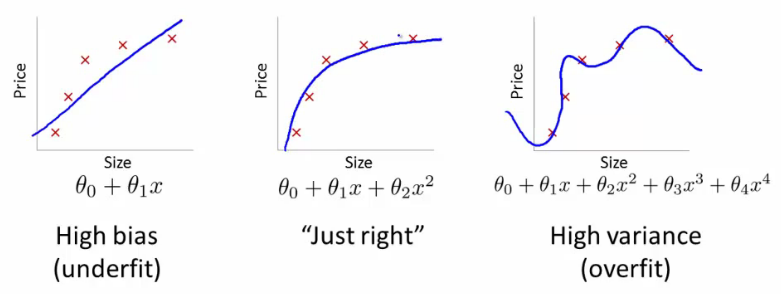

In [133]:
from IPython.display import Image
Image('http://i.stack.imgur.com/zbNLd.png')

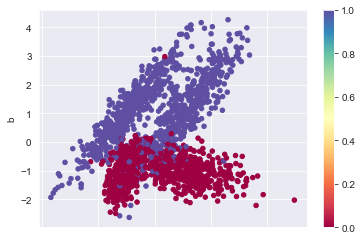

In [282]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, n_informative=2)

pd.DataFrame(X, columns=['a', 'b']).plot.scatter(x='a', y='b', c=y, cmap='Spectral');

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [285]:
X.shape

(2000, 2)

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [287]:
tr_te_acc = {}

for k in range(1, 20):
    knn_1 = KNeighborsClassifier(n_neighbors=k)
    knn_1.fit(X_train, y_train)

    tr_acc = accuracy_score(knn_1.predict(X_train), y_train)
    te_acc = accuracy_score(knn_1.predict(X_test), y_test)

    tr_te_acc[str(k).zfill(2)] = (tr_acc, te_acc)

<AxesSubplot:>

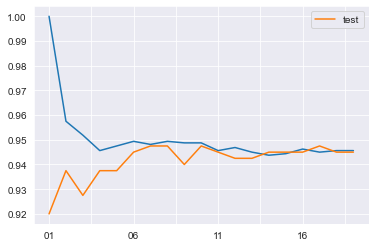

In [289]:
pd.Series({k:tr_te_acc[k][0] for k in tr_te_acc}, name = 'train').plot()
pd.Series({k:tr_te_acc[k][1] for k in tr_te_acc}, name = 'test').plot(legend=True)

Visualizing Bias and its relationship with model hyperparameters


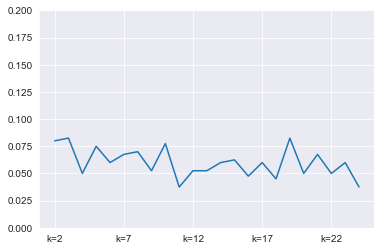

In [294]:
dict_knn = {}
# 'k' is the essential hyperparameter of the kNN algorithm that controls its complexity.
# We will try to visualize the relationship between model accuracy (or 1 - model error) and k

for k in range(2, 25):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    dict_knn['k=' + str(k)] = 1 - accuracy_score(y_test, knn.predict(X_test))

print("Visualizing Bias and its relationship with model hyperparameters")
pd.Series(dict_knn).plot(ylim=(0, 0.2));

---
### How to detect `overfitting` and `underfitting`

- Dataset has Xs and Y.
- Split into Train, Test.
- Find `Training Accuracy` (predict using the train set, and you know actual) 
- Find `Test accuracy` 

> - IF Train Accuracy = High, Test Accuracy = Low ==> Overfitted
- IF Train Accuracy = Low ==> Underfitted


----

---
## Cross Validation

One problem with the 3-part split is that we drastically reduce the number of samples which can be used for learning the model. Our model can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. 

Computationally, the data is split repeatedly into a training and test sets, with a separate model built for every pair. The test-set scores are then aggregated. 

** K-fold Cross Validation **

The most common way to do cross-validation is k-fold cross-validation, in which the data is first split into k (often 5 or 10) equal-sized folds, and then for each iteration, one of the k folds is used as test data, and the rest as training data

** Other CV functions **

The ``sklearn.cross_validation`` module has all functions related to cross validation. There easiest function is ``cross_val_score`` which takes an estimator and a dataset, and will do all of the splitting for you:

    from sklearn.cross_validation import cross_val_score
    scores = cross_val_score(classifier, X, y, cv=5)
    # this implements 5-fold Cross Validation
    print(scores)
    print(np.mean(scores))

Different cross-validation methods available in `scikit-learn` include:

    KFold, StratifiedKFold, ShuffleSplit, LeavePLabelOut
            
By default, `cross_val_score()` will use ``StratifiedKFold`` for classification, which ensures that the **class proportions are preserved** in each fold. 
With standard KFold, labels are ignored.


> If you have a binary classification dataset with 90% of data point belonging to class 0, that would mean that in each fold, 90% of datapoints would belong to class 0. If you would just use KFold cross-validation, it is likely that you would generate a split that only contains class 0.

---

Cross Validation functions take a `scoring=` parameter, which is set to 'accuracy' by default. Other possible values are --

```
'accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc'
```
---



Examples:

<img src="http://image.slidesharecdn.com/petutorial-150413084118-conversion-gate01/95/performance-evaluation-for-classifiers-tutorial-59-638.jpg?cb=1428914518">

In [296]:
from sklearn.model_selection import cross_val_score

In [297]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), X_train, y_train, cv=10, scoring='recall_weighted')

In [298]:
scores

array([0.93125, 0.9375 , 0.9375 , 0.925  , 0.9375 , 0.9    , 0.93125,
       0.90625, 0.94375, 0.89375])

In [302]:
print(f"CrossValidated Recall has a mean of {scores.mean().round(2)} and a standard deviation of {scores.std().round(3)}")

CrossValidated Recall has a mean of 0.92 and a standard deviation of 0.017


---
# $Grid Search$ for Hyperparameter Optimization

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVC?

### Finding the right fit

Unfortunately, **there is no general rule** how to find the sweet spot, between bias and variance, and so machine learning practitioners have to find the best trade-off of model-complexity and generalization by **trying several parameter settings.** Typical examples include 

- _C, kernel, gamma_ for Support Vector Classifier, 
- _alpha_ for Lasso
- Tree Depth, No. of Trees for RF
- No. of Neighbors for KNN

and so on.


etc.

A simple example for optimizing a single parameter would be testing out different values of `k` in a kNN algorithm.

If multiple parameters are important, we try all possible combinations by constructing a grid and searching through it. For example, in an SVM, both `c` and `gamma` need to be optimized.

> Such parameters (often referred to as _hyperparameters_) provided when constructing an estimator may be optimized. 



All the parameters that the Support Vector Classifier can be configured with

----
```
SVC(self, C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)
```
---

Example configurations

```
1. C=1, kernel='rbf', gamma='auto'
2. C=0.1, kernel='rbf', gamma='auto'
3. C=10, kernel='rbf', gamma='auto'

1. C=0.1, kernel='poly', gamma='auto'
2. C=0.1, kernel='linear', gamma='auto'
````


> We create a grid of the **search space** and say, "Look for the best combination of C, Kernel and Gamma over these values that optimize my performance metric"


### Estimation using `GridSearchCV`

A search consists of:

- an estimator
- a parameter space (declared as a **dictionary**)
- a method for searching or sampling candidates;
- a cross-validation scheme; and
- a score function.

There is a built-in class for this functionality in scikit-learn called `GridSearchCV()` We will start by creating an object of this class.

    gscv_knn = GridSearchCV(Classifier, X_train, y_train, grid=, scoring=, cv=, verbose=True)

> The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested

GridSearchCV is a **meta-estimator**, ie, it takes an estimator like SVM, and creates a new estimator, that behaves exactly the same so that we can call `fit()` on it.

    grid.fit(X, y)
    
What `fit` does is a bit more involved then what we did above. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

Then, as with all models, we can use predict or score

    grid.predict(X)
    
You can inspect the best parameters found by ``GridSearchCV`` in the ``.best_params_`` attribute, and the best score in the ``.best_score_`` attribute:

    print(grid.best_score_)
    print(grid.best_params_)
    
### Rationale for using CV Set

By doing a grid search, we might be committing a mistake is called a **multiple hypothesis testing error**. 

> If you try many parameter settings, some of them will work better just by chance. 

It is therefore good practice to use CV and perform all parameter optimization using the Validation sample while holding out the Test set for a final measure of out-of-sample accuracy.

### If we had to do this manually,

In [ ]:
for k in ['linear', 'rbf']:
    for c in [0.1, 10, 1]:
        svc_1 = SVC(kernel=k, C=c)
        score = cross_val_score(svc_1, X_train, y_train, cv=5)
        print('Kernel=', k, '...C=', c, '...Accuracy=', round(score.mean(), 4)

---

## $Example$

In [381]:
from sklearn.datasets import load_iris

X = load_iris()['data']
y = load_iris()['target']

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.85, random_state=312543)

In [384]:
from sklearn.model_selection import GridSearchCV

In [387]:
from sklearn.svm import SVC

svm_params = {'kernel': ['poly', 'rbf', 'linear'], 
              'C': [10, 0.1, 1]}

gscv_scm = GridSearchCV(estimator=SVC(), 
                        param_grid=svm_params, 
                        cv=5, 
                        scoring='accuracy', 
                        verbose=True)
gscv_scm.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 0.1, 1],
                         'kernel': ['poly', 'rbf', 'linear']},
             scoring='accuracy', verbose=True)

In [389]:
gscv_scm.best_score_

0.9763076923076923

In [390]:
gscv_scm.best_estimator_

SVC(C=0.1, kernel='poly')

In [391]:
gscv_scm.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [392]:
gscv_scm.predict(X_test)

array([2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1,
       1])

In [393]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gscv_scm.predict(X_test))

1.0

In [165]:
from sklearn.cross_validation import cross_val_score
cross_val_score(gscv_scm.best_estimator_, X_test, y_test, cv=3).mean()

1.0

---
## GridSearchCV on kNN

In [167]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [170]:
from sklearn.neighbors import KNeighborsClassifier

print("Running Grid Search to find best parameters for kNN...")
start_time = time.time()

knn_params = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'weights': ['uniform', 'distance']
    }

gscv_knn = GridSearchCV(KNeighborsClassifier(), 
                        knn_params, 
                        scoring='accuracy',
                        cv=5,
                        verbose=1,
                        n_jobs=-1).fit(X_train, y_train)

print(f"Finished in {time.time() - start_time} seconds")

print(f"\nBest performing kNN parameters ...:{gscv_knn.best_params_}")

Running Grid Search to find best parameters for kNN...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Finished in 1.21979093552 seconds

Best performing kNN parameters ...: {'n_neighbors': 15, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
